In [55]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import json
import datetime


from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering
#import scipy.cluster.hierarchy as sch



In [57]:
data = pd.read_csv('diagnose_merged.csv')
data.head()
#print(data)

data2 = pd.read_csv('PATIENTS.csv')
data2.head()
print(data2)

       ROW_ID  SUBJECT_ID GENDER                  DOB                  DOD  \
0         234         249      F  2075-03-13 00:00:00                  NaN   
1         235         250      F  2164-12-27 00:00:00  2188-11-22 00:00:00   
2         236         251      M  2090-03-15 00:00:00                  NaN   
3         237         252      M  2078-03-06 00:00:00                  NaN   
4         238         253      F  2089-11-26 00:00:00                  NaN   
...       ...         ...    ...                  ...                  ...   
46515   31840       44089      M  2026-05-25 00:00:00                  NaN   
46516   31841       44115      F  2124-07-27 00:00:00                  NaN   
46517   31842       44123      F  2049-11-26 00:00:00  2135-01-12 00:00:00   
46518   31843       44126      F  2076-07-25 00:00:00                  NaN   
46519   31844       44128      M  2098-07-25 00:00:00                  NaN   

                  DOD_HOSP DOD_SSN  EXPIRE_FLAG  
0            

In [58]:
merged = pd.merge(data, data2, how='inner', on=['SUBJECT_ID'])
merged.head()
#print(merged)

,Unnamed: 0,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE,ROW_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,2,163353,1.0,V3001,Single lb in-hosp w cs,"Single liveborn, born in hospital, delivered b...",1,M,2138-07-17 00:00:00,NaN,NaN,NaN,0
1,1,2,163353,2.0,V053,Need prphyl vc vrl hepat,Need for prophylactic vaccination and inoculat...,1,M,2138-07-17 00:00:00,NaN,NaN,NaN,0
2,2,2,163353,3.0,V290,NB obsrv suspct infect,Observation for suspected infectious condition,1,M,2138-07-17 00:00:00,NaN,NaN,NaN,0
3,3,3,145834,9.0,2639,Protein-cal malnutr NOS,Unspecified protein-calorie malnutrition,2,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1
4,4,3,145834,7.0,6826,Cellulitis of leg,"Cellulitis and abscess of leg, except foot",2,M,2025-04-11 00:00:00,2102-06-14 00:00:00,NaN,2102-06-14 00:00:00,1


In [59]:
#X = 'ICD9_CODE'
#dendrogram = sch.dendrogram(sch.linkage('X', method='ward'))

#X = 'ICD9_CODE'
#linked = linkage(X, 'complete')

In [60]:
# patient and diagnosis 
# x = diagnosis group 
#correlation or covariate= corx  

#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
#cluster.fit_predict(X)

In [61]:
#import scipy.cluster.hierarchy as shc
#plt.figure(figsize=(10, 7))  
#plt.title("Dendrograms")  
#dend = shc.dendrogram(shc.linkage(data, method='complete'))


In [69]:
## compute correlation distance 
dist = merged.corr()

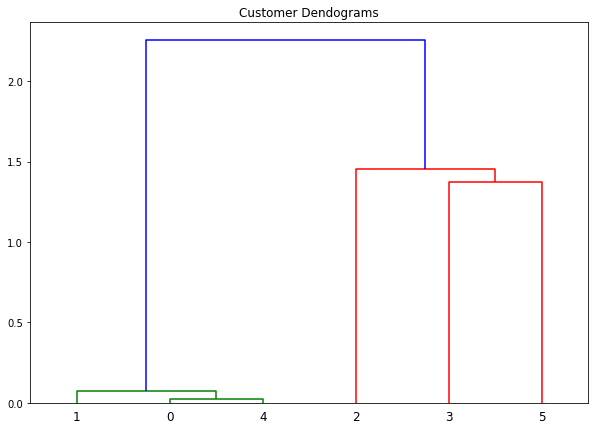

In [72]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
#dist= shc.distance.pdist(merged.corr(), 'hamming')
dend = shc.dendrogram(shc.linkage(dist, method='complete'))
#dend = shc.dendrogram(shc.linkage(d, merged, method='complete'))

In [74]:

from sklearn.cluster import AgglomerativeClustering
#cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='=complete')
cluster = AgglomerativeClustering(n_clusters=6, affinity='precomputed',linkage='complete')  
cluster.fit_predict(dist)

array([3, 5, 4, 1, 2, 0])

In [76]:
#plt.figure(figsize=(10, 7))
plt.scatter(dist[:,0], dist[:,1], c=cluster.labels_, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [45]:
## gender. male female

# X  is ndarray
#An m by n array of m original observations in an n-dimensional space.

#X = 'GENDER'
#correlation matrix
d = sch.distance.pdist(merged.corr(), 'hamming')
L = sch.linkage(d, method='complete')
##corrleation distance for binary category var gender 
#d = sch.distance.pdist(X, lambda u, v: u != v)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)